# Testing on own dataset

## Importing images

In [313]:
%matplotlib inline

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


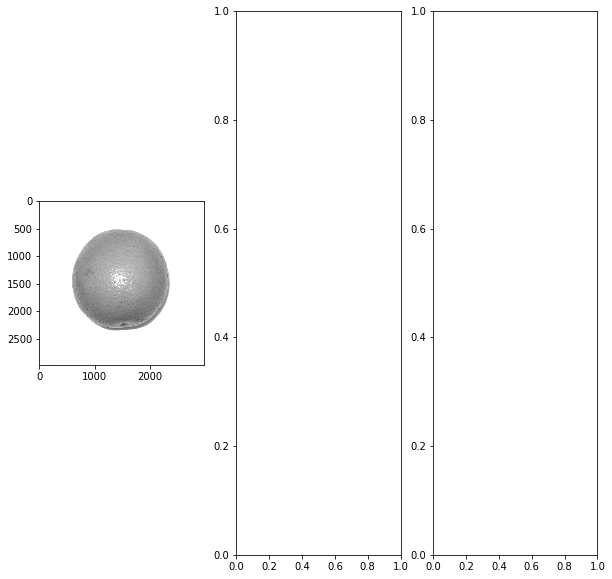

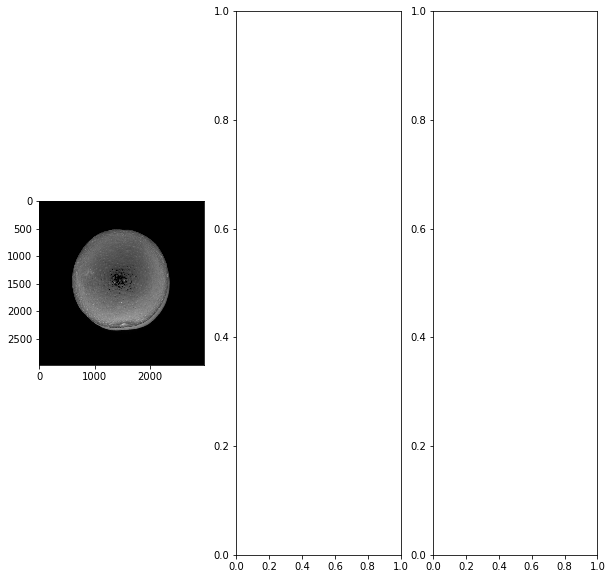

In [314]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from random import randint


# path to fruit360 dataset
path = '/home/gino/Desktop/my_dataset/'

def img_grayscale(image):
    return io.imread(image, as_gray=True)

banana_collection = io.ImageCollection(path + '/Test/Orange/*.jpg', load_func=img_grayscale)
#orange_collection = io.ImageCollection(path + 'fruits-360/Training/Orange/*.jpg')
#lemon_collection = io.ImageCollection(path + 'fruits-360/Training/Lemon/*.jpg')

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))

sample_banana = banana_collection[randint(0, len(banana_collection) - 1)]
ax0.imshow(sample_banana, cmap='gray')
#ax1.imshow(banana_collection[5], cmap='gray')
#ax2.imshow(banana_collection[9], cmap='gray')

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))

ax0.imshow(1 - sample_banana, cmap='gray')
#ax1.imshow(1 - banana_collection[5], cmap='gray')
#ax2.imshow(1 - banana_collection[9], cmap='gray')


print(banana_collection[0])

## Filtering

In [315]:
from skimage import filters

14.88
(2976, 2976)
float64


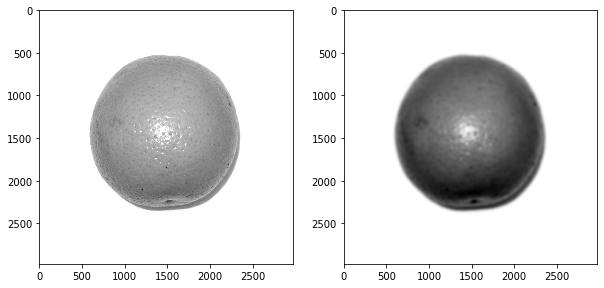

In [316]:
sigma = 0.005*sample_banana.shape[0]
print(sigma)

gauss_filtered = filters.gaussian(sample_banana, sigma=sigma)

print(gauss_filtered.shape)
print(sample_banana.dtype)

fig, ax = plt.subplots(1, 2)

ax[0].imshow(sample_banana, cmap='gray')
ax[1].imshow(gauss_filtered, cmap='gray')

fig.set_size_inches(10, 10)

## Canny filter

In [317]:
from skimage import feature
import matplotlib.pyplot as plt

#canny_filtered_lowsigma = feature.canny(sample_banana, sigma=.1)
#canny_filtered_hisigma = feature.canny(sample_banana, sigma=25)


#fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 18))

#ax[0].imshow(sample_banana, cmap='gray')
#ax[1].imshow(canny_filtered_lowsigma, cmap='gray')
#ax[2].imshow(canny_filtered_hisigma, cmap='gray')


## Thresholding

In [318]:
# Trying all thresholding techniques

#fig, ax = filters.try_all_threshold(gauss_filtered, figsize=(10, 8), verbose=False)
#plt.show()

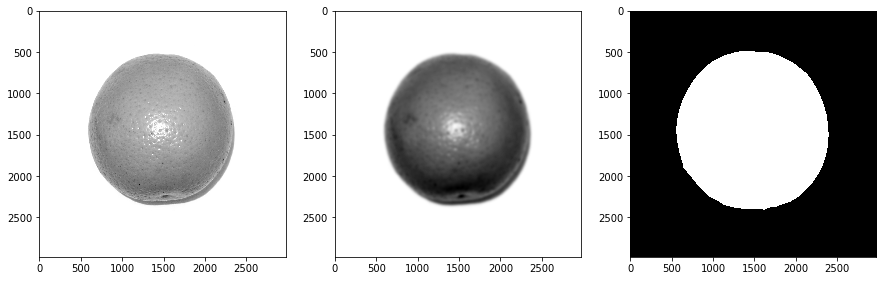

In [319]:
sigma = 0.005*sample_banana.shape[0]

#for banana in banana_collection:

#    fig, ax = filters.try_all_threshold(filters.gaussian(sample_banana, sigma=sigma), figsize=(10, 8), verbose=False)
#    print(filters.threshold_triangle(banana))
#plt.show()

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15, 15))

threshold = filters.threshold_triangle(gauss_filtered)

thresholded_fruit = gauss_filtered < threshold

ax[0].imshow(sample_banana, cmap='gray')
ax[1].imshow(gauss_filtered, cmap='gray')
ax[2].imshow(thresholded_fruit, cmap='gray')




In [320]:
from skimage import measure

fruit_central_moments = measure.moments_central(thresholded_fruit)
hu_moments = measure.moments_hu(measure.moments_normalized(fruit_central_moments))
# We only keep relevant hu moments, that is, components 1 and 3
hu_moments = hu_moments[[1, 3]]

# And we apply a log transform to them
hu_moments = np.array([-1*np.sign(j)*np.log10(np.abs(j)) for j in hu_moments[:]])

print(hu_moments)

[4.21304152 9.14684827]
